### Assignment Instructions

In this assignment, you will build and evaluate **five Bayesian logistic regression models using PyMC**. Your goal is to classify students as **"Excellent"** or **"Bad"** based on different input features from the dataset.

#### Dataset Description

The dataset includes the following columns:

- `study_hours`
- `sleep_hours`
- `social_time`
- `quiz_score`  
- **Target column**: `student_type` (values: Excellent or Bad)

#### Modeling Task

You will create five separate models. Each model will perform the same classification task but will use different input features:

- **Model 0**: Use only `study_hours` to predict `student_type`
- **Model 1**: Use only `social_time` to predict `student_type`
- **Model 2**: Use only `quiz_score` to predict `student_type`
- **Model 3**: Use both `study_hours` and `social_time`
- **Model 4**: Use both `study_hours` and `quiz_score`

This setup will help you explore how model performance changes when using different predictors, and when moving from simple to multiple logistic regression.

#### Evaluation

After building the models, compare them using **Bayesian information criteria**:

- **LOO (Leave-One-Out Cross-Validation)**
- **WAIC (Widely Applicable Information Criterion)**

Use the `arviz.compare()` function to perform the comparison. This will help you determine which model offers the best trade-off between prediction accuracy and model complexity.

#### Implementation Guidance

- The notebook contains **`TODO:` comments** throughout the code cells.
- Follow these `TODO:` markers and use the **expected output and structure** as a guide for your implementation.
- Stick closely to the template provided to ensure consistent results across all models.

#### Learning Objectives

By the end of this assignment, you should be able to:

- Build and interpret Bayesian logistic regression models using PyMC
- Understand how different input features affect classification outcomes
- Apply model comparison techniques using LOO and WAIC


**imports**

In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import pytensor.tensor as pt
import seaborn as sns
import scipy.stats as stats
from scipy.special import expit as logistic
import matplotlib.pyplot as plt
import arviz as az

In [25]:
#synthetic student dataset
df1=pd.read_csv('Syn_student.csv')

In [3]:
df1.head()

,study_hours,sleep_hours,social_time,quiz_score,student_type
0,8.248357,7.162042,1.292315,9.125246,excellent
1,7.930868,6.807459,1.789677,9.173224,excellent
2,8.323844,6.661539,1.828643,8.659988,excellent
3,8.761515,7.305838,1.598861,9.116127,excellent
4,7.882923,7.515500,1.919357,9.146536,excellent


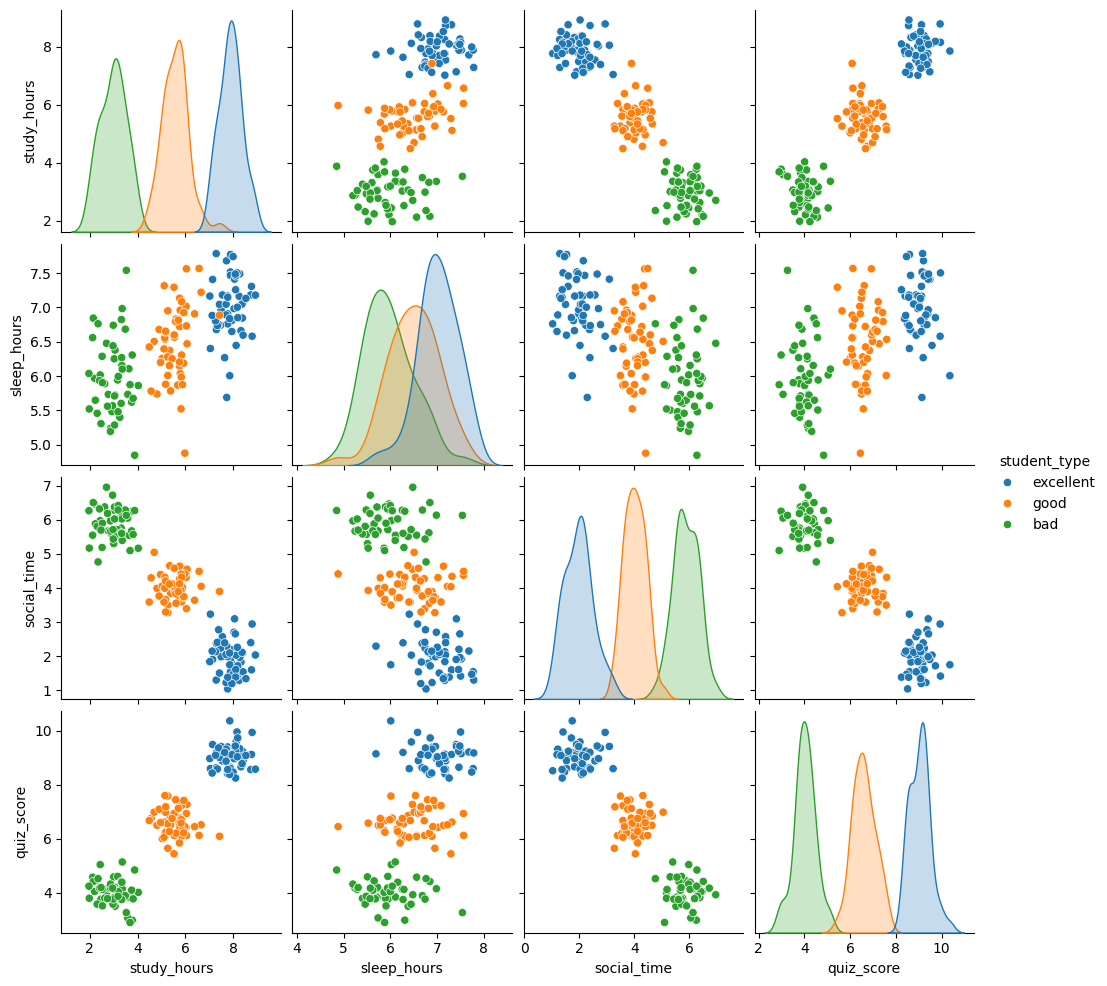

In [4]:
sns.pairplot(df1, hue='student_type', diag_kind='kde')
plt.savefig('B11197_04_03.png', bbox_inches='tight');

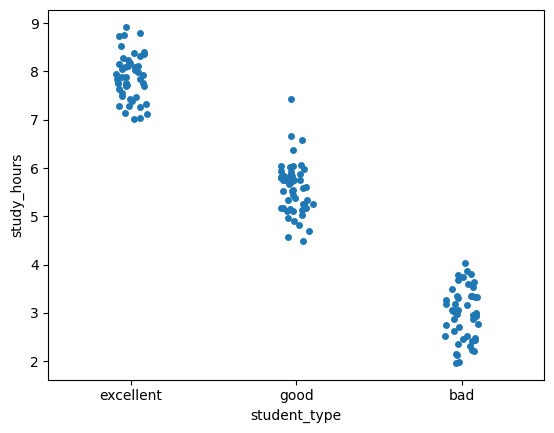

In [5]:
sns.stripplot(x="student_type", y="study_hours", data=df1, jitter=True)
plt.savefig('B11197_04_02.png', dpi=300);

**Select only ***quiz_score*** feature and classify the excellent and bad**

In [6]:
df = df1.query("student_type == ('excellent', 'bad')")
y_0 = pd.Categorical(df['student_type']).codes
x_n = 'study_hours' 
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

## Model 0: study_hours Only

In [ ]:
# TODO: Build a PyMC model using only 'study_hours' to classify student_type (Excellent/Bad)
# - Define a logistic regression model
# - Use 'study_hours' as the input feature
# - Convert 'student_type' into binary labels if needed
# - Sample from the posterior using pm.sample()
# - Store the trace and model for later comparison



















In [8]:
# TODO: show summary

















,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.329,9.888,-16.944,19.763,0.381,0.237,670.0,679.0,1.0
β,6.039,2.404,2.389,10.274,0.099,0.037,591.0,540.0,1.0
bd,-0.119,2.203,-3.879,4.706,0.084,0.076,725.0,878.0,1.0


C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\arviz\plots\hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


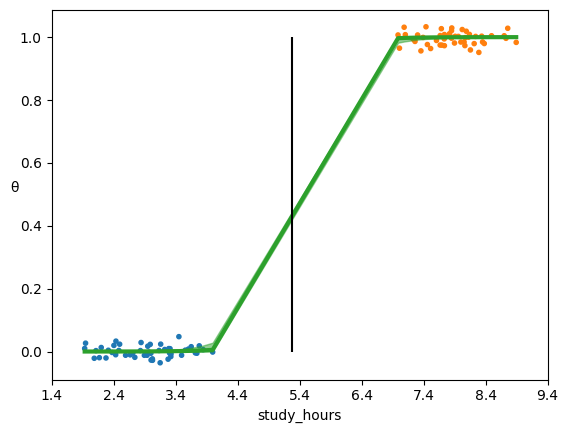

In [9]:
# TODO: Show boundery plot
























# ---------------------------------------------------------------------------------------------

## Model 1: social_time Only

In [11]:

# TODO: Build a PyMC model using only 'social_time' to classify student_type
# - Follow the same steps as in Model 0
# - Use 'social_time' as the only predictor





















Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [α, β]


C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 17 seconds.
There were 446 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\arviz\plots\hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


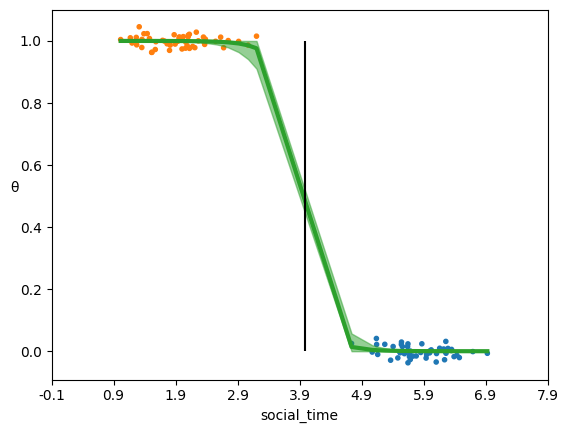

In [12]:
#  TODO: Show boundery plot























# ----------------------------------------

# Model 2: quiz_score Only

In [14]:
# TODO: Build a PyMC model using only 'quiz_score' to classify student_type
# - Set up a logistic regression with 'quiz_score' as the input
# - Use the same structure as in the previous models

















Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [α, β]


C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.
There were 501 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\arviz\plots\hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


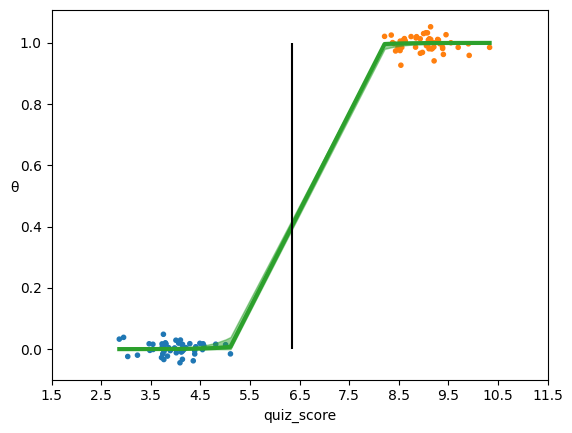

In [15]:
# TODO: Show boundery plot






















# ------------------------------------------------------------------------------------

## Model 3: study_hours and social_time


In [17]:
# TODO: Build a multiple logistic regression model using 'study_hours' and 'quiz_score'
# - Follow the same approach as in Model 3
# - Use both features to predict student_type




















Initializing NUTS using jitter+adapt_diag...
C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\pytensor\link\c\cmodule.py:2959: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [α, β]


C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 28 seconds.
There were 591 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


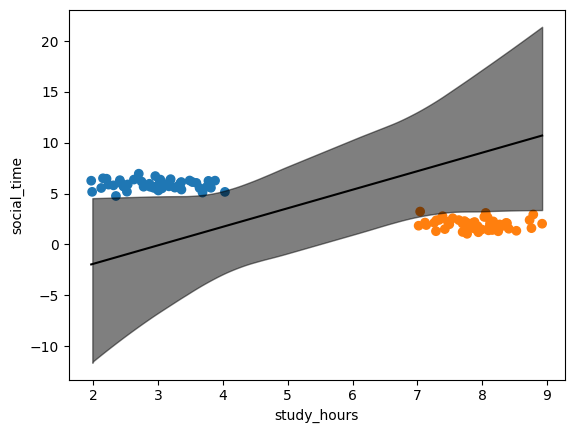

In [18]:
# TODO: Show boundery plot


















## Model 4: study_hours and quiz_score

In [20]:
# TODO: Build a multiple logistic regression model using 'study_hours' and 'quiz_score'
# - Follow the same approach as in Model 3
# - Use both features to predict student_type
















Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [α, β]


C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 27 seconds.
There were 343 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


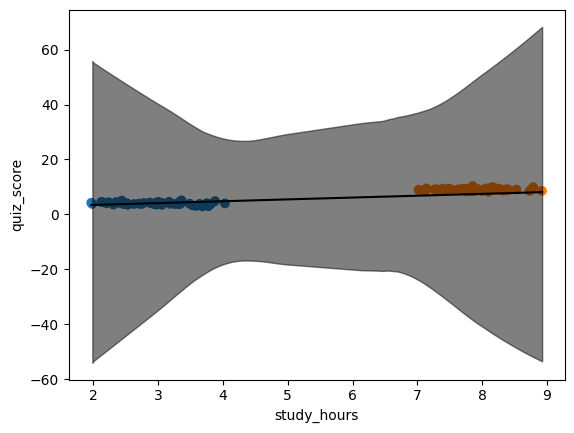

In [21]:
# TDOO : Show boundery plot













## Comparison via Information criteria
- LOO or
- WAIC

In [23]:
# TODO: Compare models via az. compare functions









C:\Users\Almas\anaconda3\envs\python3\Lib\site-packages\arviz\stats\stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model_0,0,0.161298,0.001162,0.000000,0.238131,0.018961,0.000000,False,deviance
model_2,1,0.207122,0.001978,0.045823,0.232573,0.022638,0.029789,False,deviance
model_1,2,0.266323,0.003710,0.105025,0.225965,0.067082,0.066237,True,deviance
model_3,3,0.838994,0.047996,0.677695,0.170991,0.183690,0.172610,False,deviance
model_4,4,1.343143,0.037953,1.181845,0.132340,0.152657,0.143173,False,deviance


<Axes: title={'center': 'Model comparison\nlower is better'}, xlabel='elpd_loo (deviance)', ylabel='ranked models'>

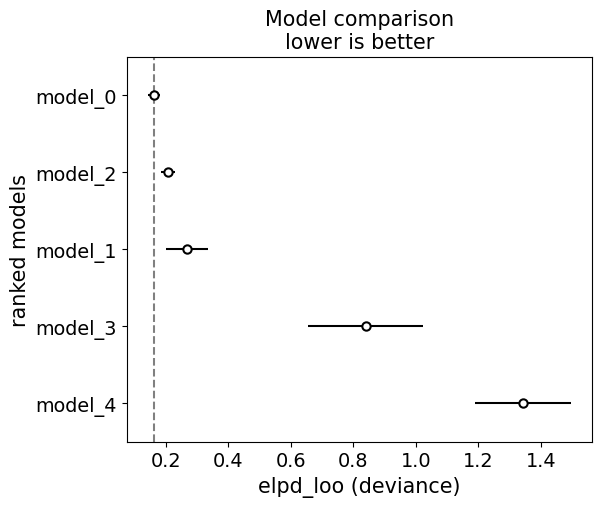

In [24]:
# TODO: Plot comparison 










### Final Questions

1. **Which model had the best predictive performance and why?**  
2. **Which model was the most complex and why?**  
3. **Which feature(s) had the most influence on predicting student type?**  
4. **What are the trade-offs when comparing models using LOO/WAIC?**  
5. **What are the advantages of using Bayesian logistic regression over traditional logistic regression?**
